#QUESTION 1

In [ ]:
import numpy as np

# XOR truth table inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
y = np.array([0, 1, 1, 0])  # output


Attempting to implement using a single layer perceptron

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_func = self.step_function
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

# Initialize perceptron model
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X, y)

# Predict
predictions = perceptron.predict(X)
print(f"Predicted outputs: {predictions}")
print(f"Actual outputs: {y}")


Predicted outputs: [1 1 0 0]
Actual outputs: [0 1 1 0]


**Interpretation** : The Single Layer Perceptron cannot correctly classify the XOR dataset, as the outputs will not match the XOR gate truth table. This is because XOR is not linearly separable

###Implementing XOR with Multi-Layer Perceptron (MLP)
Since a Single Layer Perceptron fails to classify XOR, a Multi-Layer Perceptron (MLP) can solve this problem by introducing non-linearity via hidden layers. We will use an MLP with one hidden layer

In [21]:
model = Sequential()

# Input layer with 2 neurons and hidden layer with 4 neurons, ReLU activation
model.add(Dense(4, input_dim=2, activation='relu'))

# Output layer with 1 neuron, sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=1000, verbose=1)

_, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")
predictions = model.predict(X)
predictions = np.round(predictions).astype(int)
print(f"Predicted outputs: {predictions.flatten()}")
print(f"Actual outputs: {y}")


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step - accuracy: 0.5000 - loss: 0.7668
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2500 - loss: 0.7661
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2500 - loss: 0.7655
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2500 - loss: 0.7648
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2500 - loss: 0.7642
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2500 - loss: 0.7635
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.7629
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2500 - loss: 0.7623
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2500 - loss: 0.7617
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2500 - loss: 0.7611
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2500 - loss: 0.7605
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy

#QUESTION 2

In [ ]:
import pandas as pd
data = pd.read_csv('IMDB Dataset.csv')


In [ ]:
data.head()

,review,sentiment,cleaned_reviews
0,"Starts really well, nice intro and build up fo...",negative,starts really well nice intro and build up for...
1,"Terrific movie: If you did not watch yet, you ...",positive,terrific movie if you did not watch yet you mu...
2,I've seen hundreds of silent movies. Some will...,positive,ive seen hundreds of silent movies some will a...
3,i had been looking for this film for so long b...,positive,i had been looking for this film for so long b...
4,"Good: Engaging cinematic firefights, great pre...",positive,good engaging cinematic firefights great prese...


First we trim the dataset, to have only 5000 of each category

In [ ]:
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

# Trim the dataset to 5000 positive and 5000 negative reviews
positive_trimmed = positive_reviews.sample(n=5000, random_state=42)
negative_trimmed = negative_reviews.sample(n=5000, random_state=42)

trimmed_data = pd.concat([positive_trimmed, negative_trimmed])

trimmed_data = trimmed_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(trimmed_data.shape)

(10000, 2)


In [ ]:
trimmed_data.to_csv('trimmed_IMDb_reviews.csv', index=False)


In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('trimmed_IMDb_reviews.csv')


We cannot directly feed text into an ANN. Instead, we need to convert the text into numerical data.
We'll use the TF-IDF method to convert the reviews into numerical representations.



In [ ]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

data['cleaned_reviews'] = data['review'].apply(clean_text)


In [ ]:
# Vectorizing the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_reviews']).toarray()

In [ ]:
# Encode the target labels (positive=1, negative=0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentiment'])


Cleaning the text: Removing noise from the text helps the model focus on relevant patterns.

TF-IDF vectorization: This converts the cleaned text into a fixed-size matrix, where each word's importance is weighted by its frequency in the document relative to other documents.

Label encoding: Converts the labels ('positive' and 'negative') to binary values (1 for positive, 0 for negative).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Train Data Shape: (8000, 5000)
Test Data Shape: (2000, 5000)


**Building the ANN Model**

*Model Architecture*

Input layer matching the number of features (words) in our TF-IDF matrix.

One or more hidden layers with ReLU activation.

Output layer with a sigmoid activation for binary classification.

Binary Cross-Entropy as the loss function.

**ReLU** (Rectified Linear Unit) is widely used in hidden layers as it helps avoid the vanishing gradient problem and speeds up convergence.

**Sigmoid activation** in the output layer is ideal for binary classification since it squashes the output between 0 and 1, representing the probability of the positive class

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Input layer and first hidden layer with ReLU activation
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer (optional) with ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7541 - loss: 0.5656 - val_accuracy: 0.8690 - val_loss: 0.2932
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9410 - loss: 0.1709 - val_accuracy: 0.8660 - val_loss: 0.3096
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9796 - loss: 0.0811 - val_accuracy: 0.8580 - val_loss: 0.3877
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9912 - loss: 0.0428 - val_accuracy: 0.8530 - val_loss: 0.4982
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9974 - loss: 0.0200 - val_accuracy: 0.8570 - val_loss: 0.5676
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9999 - loss: 0.0054 - val_accuracy: 0.8520 - val_loss: 0.6394
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8520 - val_loss: 0.6800
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accu

#Training Accuracy and Loss:

The training accuracy reaches 100% by the 7th epoch, and the loss decreases to near zero by the 10th epoch.

This suggests that the model has learned the training data very well, potentially overfitting to it.

#Validation Accuracy and Loss:

Validation accuracy remains around 85-87%, while the validation loss starts increasing from the 3rd epoch onward, reaching 0.7661 by the 10th epoch.

This behavior indicates overfitting: the model performs well on the training data but struggles to generalize on unseen validation data.
The model is becoming too specialized to the training data, losing the ability to handle new examples effectively.

So, we can use early stopping / stopping methods to avoid potential overfitting of the model


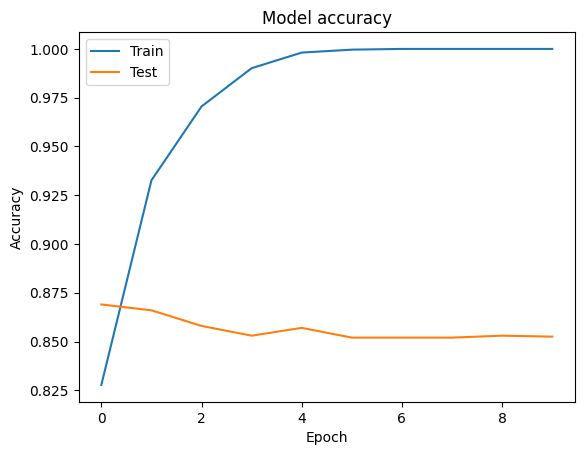

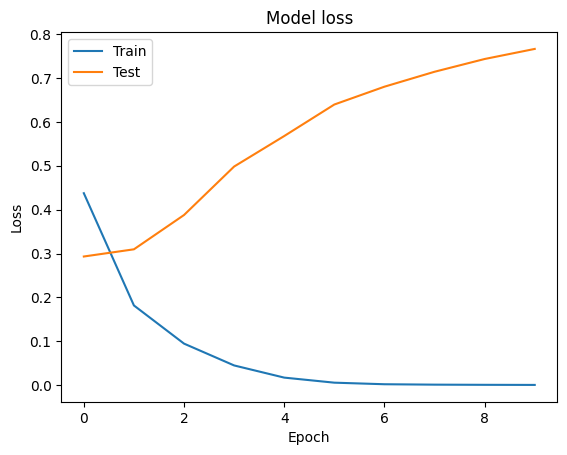

In [ ]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#Justifications and Explanations

ReLU: Helps in faster training and avoids vanishing gradients, making it more suitable for deep networks.

Sigmoid: Outputs a probability, which is essential for binary classification tasks, making it easier to interpret predictions as belonging to either class.

Binary cross-entropy is used because it's well-suited to measure the difference between actual labels (0 or 1) and predicted probabilities (between 0 and 1). It ensures that the model focuses on minimizing the difference in predicted confidence for the correct label.